# Poisson experiments

This notebook contains a collection of Poisson experiments, including the following:
- Poisson process
- Poisson regression
- Implementation of the Poisson regression model

Author: https://www.github.com/deburky

## Poisson process

<div style="width: 100%; background: #2d2440; color: white; padding: 20px; border-radius: 5px; margin-bottom: 20px;">
  <p>The 3D visualization below represents the Poisson Probability Mass Function (PMF) with:</p>
  <ul style="list-style-type: none; margin-left: 10px;">
    <li><b>λ (Rate)</b> on the horizontal axis: the expected value (mean) of the distribution.</li>
    <li><b>k (Counts)</b> on the vertical axis: the number of events observed.</li>
    <li><b>PMF value</b> on the z-axis: the probability of observing exactly k events given a Poisson process with rate λ.</li>
  </ul>
  
  <p>The chart shows how probability changes across different values of λ and k. For small λ values (1-2), probabilities peak at lower k values (0-1). As λ increases (toward 10), the probability mass shifts right, with peaks occurring at higher k values. The color gradient from dark blue to yellow represents increasing probability values.</p>
  
  <p><a href="https://stats.stackexchange.com/questions/190458/why-is-the-poisson-distribution-only-defined-for-a-positive-rate" style="color: #add8e6;">Why is the Poisson distribution only defined for a positive rate?</a></p>
</div>

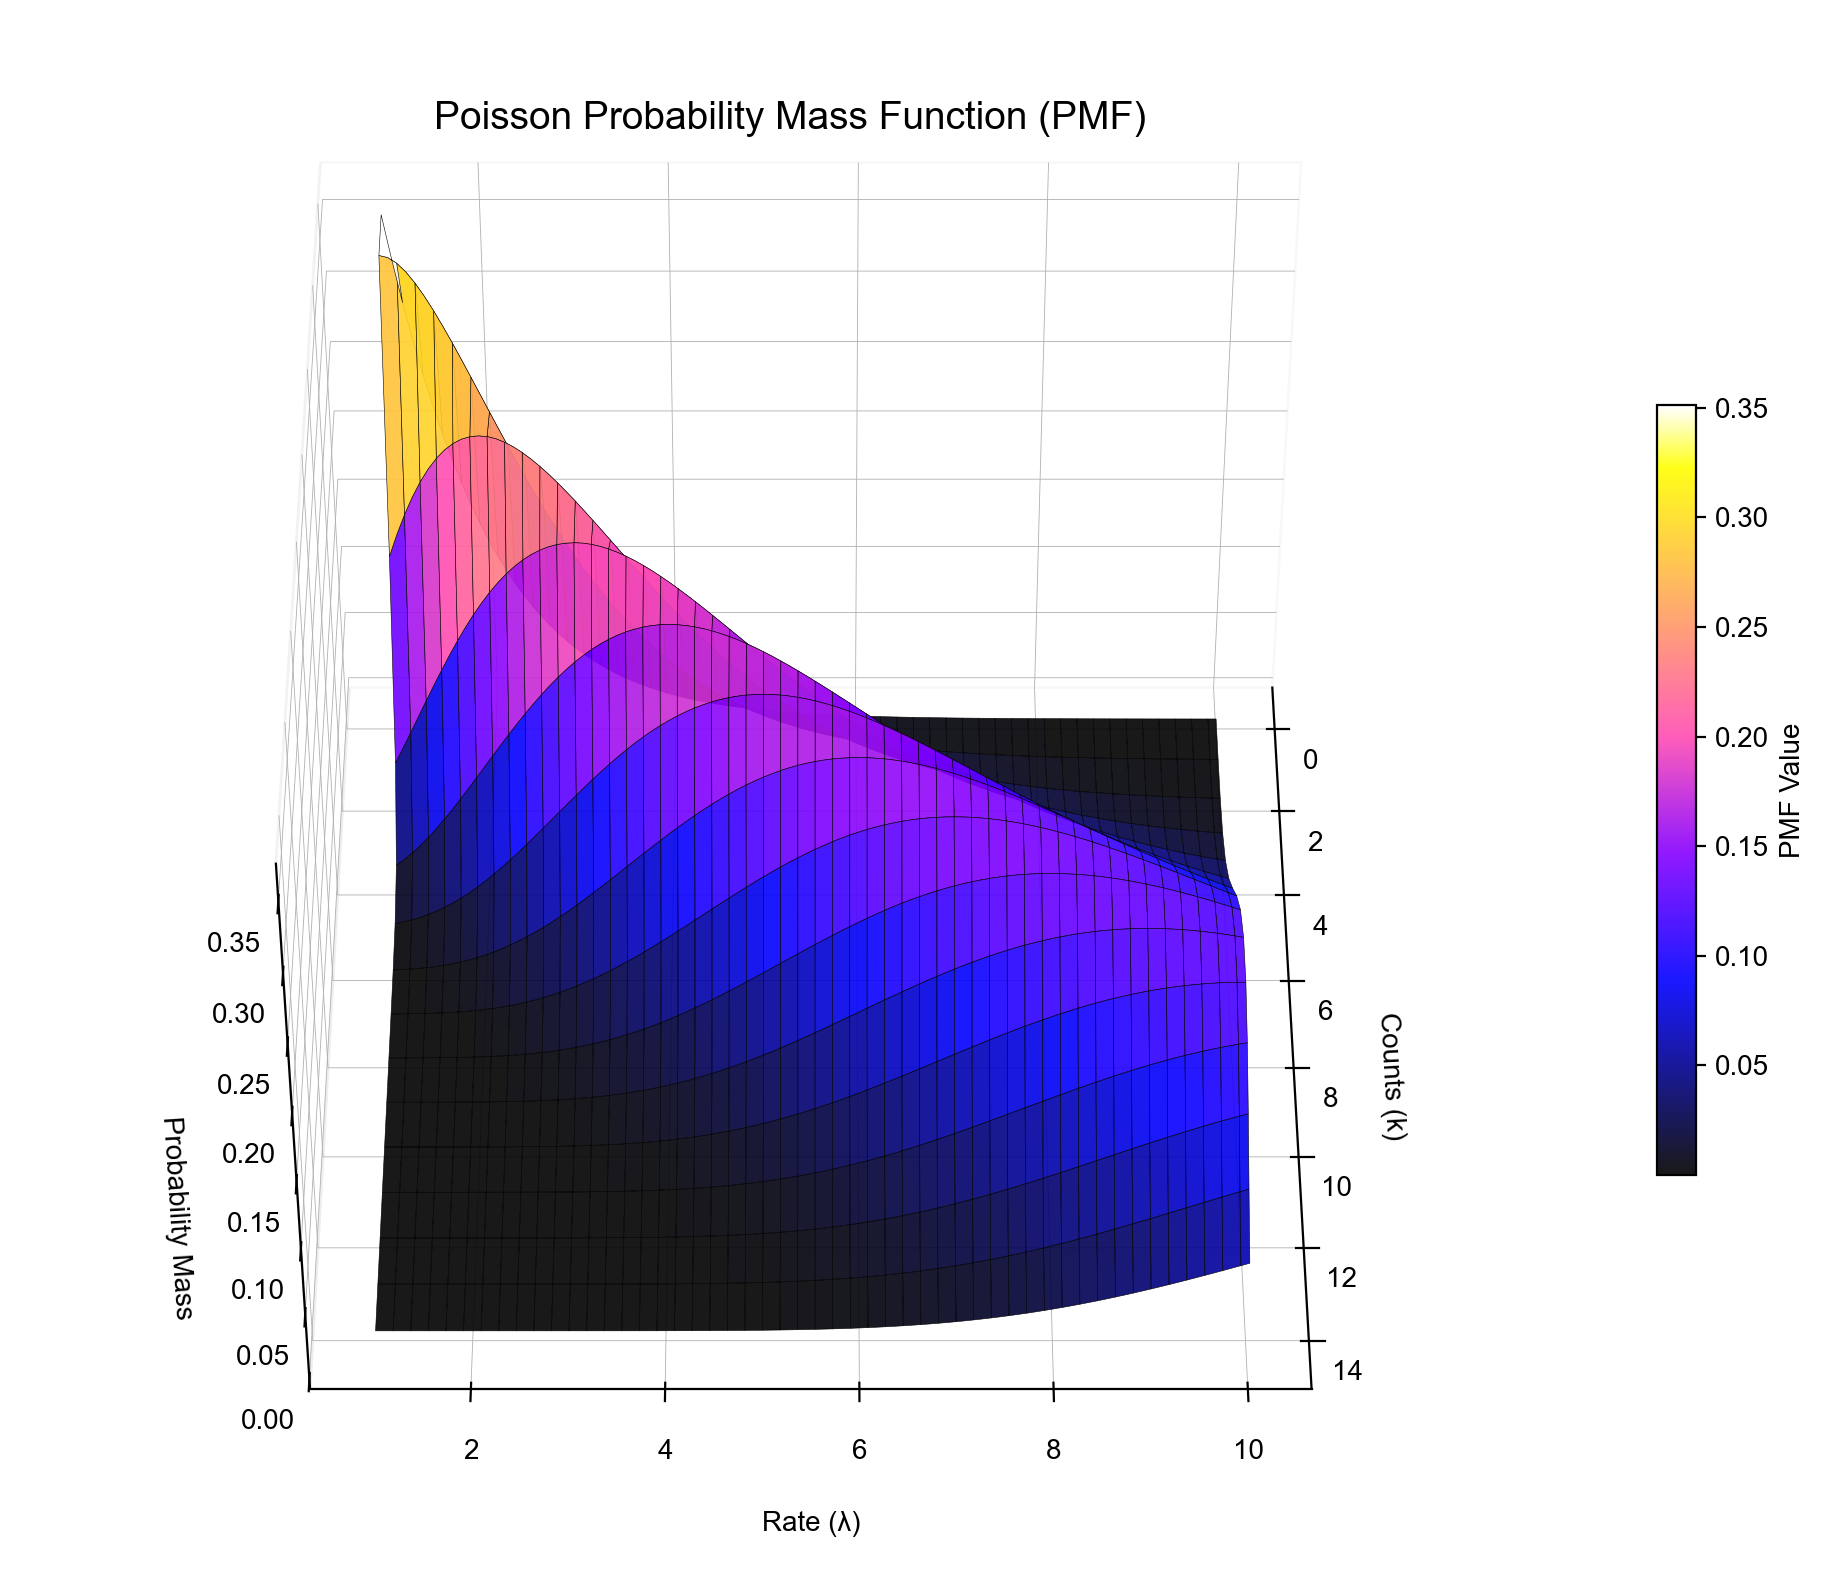

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

%config InlineBackend.figure_format = 'retina'

# set font to Arial
plt.rcParams["font.family"] = "Arial"
# Define the range for k (counts) and lambda (rate parameter)
k_values = np.arange(0, 15, 1)
lambda_values = np.linspace(1, 10, 100)

# Create a meshgrid for k and lambda
k_mesh, lambda_mesh = np.meshgrid(k_values, lambda_values)

# Compute the Poisson PMF
poisson_pmf = poisson.pmf(k_mesh, lambda_mesh)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot surface with gnuplot2-like style
surf = ax.plot_surface(k_mesh, lambda_mesh, poisson_pmf, cmap="gnuplot2", edgecolor="k", linewidth=0.2, alpha=0.9)

# Add labels and title
ax.set_title("Poisson Probability Mass Function (PMF)", fontsize=14, y=1.01, pad=0)
ax.set_xlabel("Counts (k)", labelpad=10)
ax.set_ylabel("Rate (λ)", labelpad=10)
ax.set_zlabel("Probability Mass", labelpad=10)

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=20, label="PMF Value")

# Adjust viewing angle for better aesthetics
ax.view_init(elev=45, azim=180)

ax.tick_params(axis="x", length=0, width=0)
ax.tick_params(axis="y", length=0, width=0)
ax.tick_params(axis="z", length=0, width=0)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.invert_yaxis()
ax.invert_xaxis()

ax.xaxis._axinfo["grid"]["linewidth"] = 0.3
ax.yaxis._axinfo["grid"]["linewidth"] = 0.3
ax.zaxis._axinfo["grid"]["linewidth"] = 0.3
# Show the plot
plt.tight_layout()
plt.show()

<div style="max-width: 900px; margin: 0 auto; background: #2d2440; color: white; padding: 25px; border-radius: 8px; font-family: Arial, sans-serif; line-height: 1.6; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
  
  <h3 style="margin-top: 0; color: #ffffff; border-bottom: 1px solid #6b5b95; padding-bottom: 10px;">Poisson Series Example</h3>
  <p>
    Poisson series example from R. Fisher (1925, 14th edition, p. 55), based on 200 observations from Bortkewitch's data (Prussian Horse Kick Data).
  </p>

  <div style="background: #3a3152; padding: 18px 22px; border-left: 4px solid #6b5b95; margin: 20px 0; font-style: italic; border-radius: 0 5px 5px 0; box-shadow: inset 0 1px 3px rgba(0,0,0,0.2);">
    <p>
      It may be shown theoretically that if the probability of an event is exceedingly small, but a sufficiently large number of independent cases are taken to obtain a number of occurrences, then this number will be distributed in the Poisson series.
    </p>
    <p>
      For example, the chance of a man being killed by horsekick on any one day is exceedingly small, but if an army corps of men are exposed to this risk for a year, often one or more of them will be killed in this way.
    </p>
    <p>
      The following data (Bortkewitch's data) were obtained from the records of ten army corps for twenty years, supplying 200 such observations. The average, x, is 0.61, and taking this as an estimate of m, the numbers calculated agree excellently with those observed.
    </p>
  </div>

  <div style="display: flex; align-items: center; gap: 30px; flex-wrap: wrap; margin-top: 25px;">
    <div style="flex: 1; min-width: 250px;">
      <strong style="color: #add8e6; font-size: 1.05em;">Data sources:</strong>
      <ul style="padding-left: 20px; margin: 10px 0; list-style-type: disc;">
        <li><a href="https://github.com/rmcelreath/rethinking" style="color: #add8e6; text-decoration: none; border-bottom: 1px dotted #add8e6; transition: color 0.2s ease;">McElreath 2020. Statistical Rethinking, 2nd edition, CRC Press</a></li>
        <li><a href="https://rdrr.io/cran/vcd/man/VonBort.html" style="color: #add8e6; text-decoration: none; border-bottom: 1px dotted #add8e6; transition: color 0.2s ease;">VonBort</a></li>
      </ul>
    </div>
    <div style="flex-shrink: 0; text-align: center;">
      <img src="https://img3.doubanio.com/view/subject/m/public/s4443777.jpg" width="110px" style="border-radius: 5px; border: 2px solid #6b5b95; box-shadow: 0 3px 6px rgba(0,0,0,0.3); transition: transform 0.2s ease;" alt="Fisher's Statistical Methods book cover">
      <div style="font-size: 0.8em; color: #add8e6; margin-top: 5px;">Fisher's Statistical Methods</div>
    </div>
  </div>
</div>

|  Count  |  Frequency Observed  |  Frequency Predicted  |
|:-------:|:--------------------:|:---------------------:|
|  0.00   |        109.00        |        108.67         |
|  1.00   |        65.00         |         66.29         |
|  2.00   |        22.00         |         20.22         |
|  3.00   |         3.00         |         4.11          |
|  4.00   |         1.00         |         0.63          |
|  5.00   |         0.00         |         0.08          |
|  6.00   |         0.00         |         0.01          |


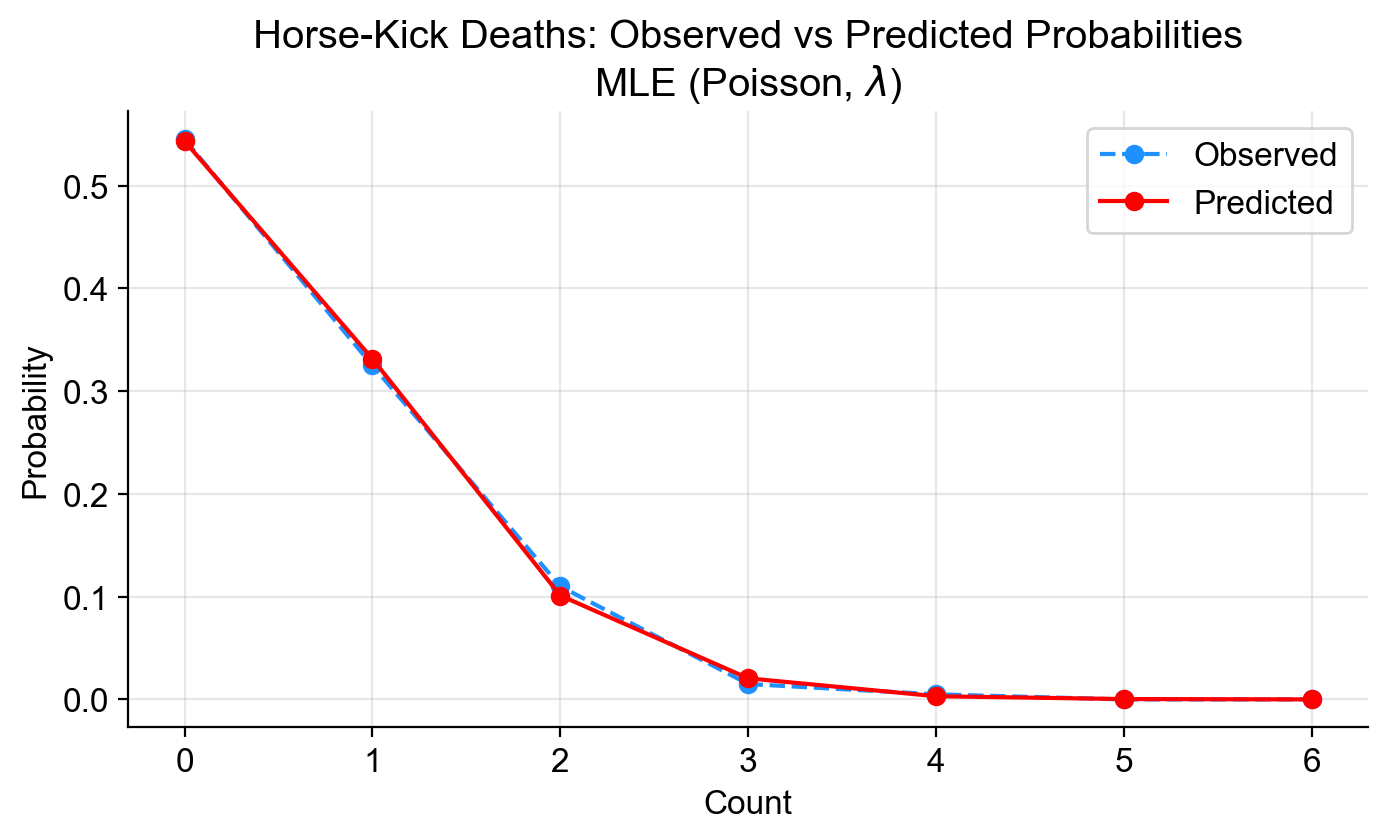

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_observed_vs_predicted

pd.set_option("display.float_format", "{:.2f}".format)

plt.rcParams["font.sans-serif"] = ["Arial"]
plt.rcParams["font.size"] = 12

# path_to_csv = (
#     "https://raw.githubusercontent.com/"
#     "vincentarelbundock/Rdatasets/refs/"
#     "heads/master/csv/vcd/VonBort.csv"
# )

path_to_csv = "datasets/PRUS/VonBort.csv"
horse_data = pd.read_csv(path_to_csv, usecols=["year", "corps", "deaths", "fisher"])
horse_data = horse_data.query("fisher == 'yes'")

fig = plt.figure(figsize=(8, 4))

y = horse_data["deaths"]

mle = np.full(len(y), y.mean())

# Plot Observed vs Predicted probabilities
df_results = plot_observed_vs_predicted(
    y,
    mle,
    max_count=6,
    title="Horse-Kick Deaths: Observed vs Predicted Probabilities",
    model_name="MLE (Poisson, $\\lambda$)",
)

# Table 4 from Fisher (1925)
subset_df_results = df_results.query("Count <= 6")[["Count", "Frequency Observed", "Frequency Predicted"]]

# Display the table
out = subset_df_results.to_markdown(
    index=False,
    tablefmt="pipe",
    colalign=["center"] * len(subset_df_results.columns),
    floatfmt=".2f",
)
print(out)

## Poisson regression

<div style="display: flex; gap: 30px; margin-bottom: 20px;">
  <div style="flex: 1; background: #2d2440; color: white; padding: 20px; border-radius: 5px;">
    <h3>Dataset: rwm ("COUNT" R Package)</h3>
    <p>This dataset uses the German health registry for the years 1984–1988, providing health information for years prior to the health reform.</p>
    <ul style="list-style-type: disc; margin-left: 20px;">
      <li><b>Type</b>: Health dataset</li>
      <li><b>Total Observations</b>: 27,326</li>
      <li><b>Key Features</b>:
        <ul style="list-style-type: circle; margin-left: 20px;">
          <li><b>docvis</b>: Number of visits to the doctor during the year (0–121)</li>
          <li><b>age</b>: Age range of individuals (25–64)</li>
          <li><b>educ</b>: Years of formal education (7–18)</li>
          <li><b>hhninc</b>: Household yearly income in DM/1000</li>
        </ul>
      </li>
    </ul>
  </div>

  <div style="flex: 1; background: #2d2440; color: white; padding: 20px; border-radius: 5px;">
    <h3>Subset: rwm1984 ("COUNT" R Package)</h3>
    <p>This subset focuses on the German health registry for the year 1984. It contains 3,874 observations with the following variables:</p>
    <div style="display: grid; grid-template-columns: 1fr 1fr; gap: 10px;">
      <div>
        <ul style="list-style-type: none; margin-left: 0;">
          <li><b>docvis</b>: Number of visits to the doctor (0–121)</li>
          <li><b>hospvis</b>: Number of days in hospital (0–51)</li>
          <li><b>edlevel</b>: Educational level (categorical: 1–4)</li>
          <li><b>age</b>: Age range of individuals (25–64)</li>
          <li><b>outwork</b>: Indicator for being out of work (1=out of work, 0=working)</li>
          <li><b>female</b>: Indicator for gender (1=female, 0=male)</li>
          <li><b>married</b>: Indicator for marital status (1=married, 0=not married)</li>
        </ul>
      </div>
      <div>
        <ul style="list-style-type: none; margin-left: 0;">
          <li><b>kids</b>: Indicator for having children (1=yes, 0=no)</li>
          <li><b>hhninc</b>: Household yearly income in DM/1000</li>
          <li><b>educ</b>: Years of formal education (7–18)</li>
          <li><b>self</b>: Indicator for self-employment (1=self-employed, 0=not)</li>
          <li><b>edlevel1</b>: Not a high school graduate (1/0)</li>
          <li><b>edlevel2</b>: High school graduate (1/0)</li>
          <li><b>edlevel3</b>: University/college graduate (1/0)</li>
          <li><b>edlevel4</b>: Graduate school (1/0)</li>
        </ul>
      </div>
    </div>
  </div>
</div>

<hr style="border: 0; height: 1px; background: #333; margin: 20px 0;">

<div style="font-size: 0.9em; text-align: center; font-style: italic;">
  Hilbe, Joseph, M (2014), <em>Modeling Count Data</em>, Cambridge University Press<br>
  Hilbe, Joseph M (2011), <em>Negative Binomial Regression</em>, Cambridge University Press<br>
  Hilbe, J. and W. Greene (2008), Count Response Regression Models, in ed. C.R. Rao, J.P Miller, and D.C. Rao, <em>Epidemiology and Medical Statistics</em>, Elsevier Handbook of Statistics Series. London, UK: Elsevier.
</div>

<div style="width: 100%; background: #2d2440; color: white; padding: 20px; border-radius: 5px; margin-bottom: 20px;">
  <div style="display: flex; gap: 20px; align-items: center;">
    <div style="flex: 3;">
      <h3>Model from Modeling Count Data by Joseph M. Hilbe</h3>
      <p>For example, given a random sample of 1000 patient observations from the German Health Survey for the year 1984, the following Poisson model output explains the years expected number of doctor visits on the basis of gender and marital status, both recorded as binary (1/0) variables, and the continuous predictor, age.</p>
    </div>
    <div style="flex: 1; text-align: center;">
      <img src="https://m.media-amazon.com/images/I/611BNtdUglL._AC_UF1000,1000_QL80_.jpg" width="100px">
    </div>
  </div>
</div>

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 3874
Model:                            GLM   Df Residuals:                     3871
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8334.4
Date:                Sun, 04 May 2025   Deviance:                       4264.6
Time:                        17:46:09   Pearson chi2:                 6.46e+03
No. Iterations:                     8   Pseudo R-squ. (CS):            0.05832
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
female_1       0.4110      0.049      8.413      0.0

,Count,Frequency Observed,Frequency Predicted,Probability Observed,Probability Predicted
0,0,1611,264.58,0.42,0.07
1,1,448,620.32,0.12,0.16
2,2,440,788.65,0.11,0.20
3,3,353,731.45,0.09,0.19
4,4,213,560.28,0.05,0.14
5,5,168,379.15,0.04,0.10
6,6,141,235.80,0.04,0.06
7,7,60,137.84,0.02,0.04
8,8,85,76.61,0.02,0.02
9,9,47,40.66,0.01,0.01


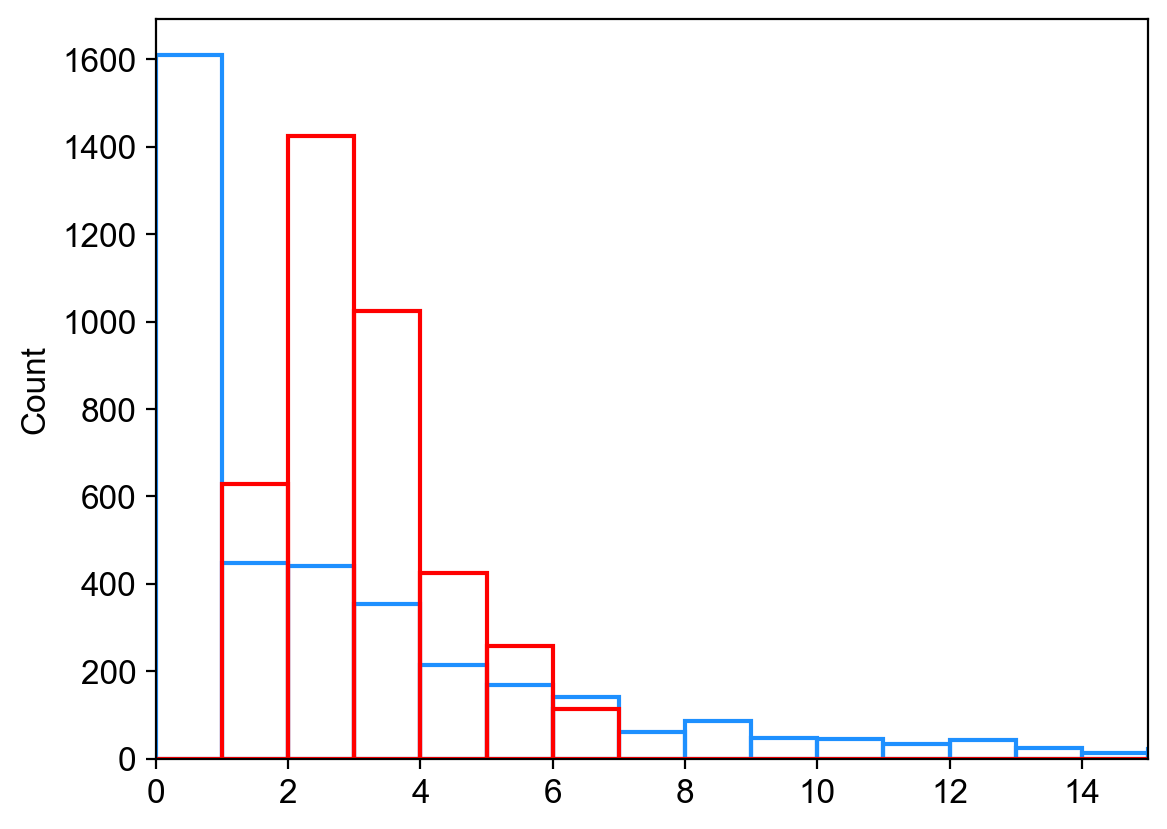

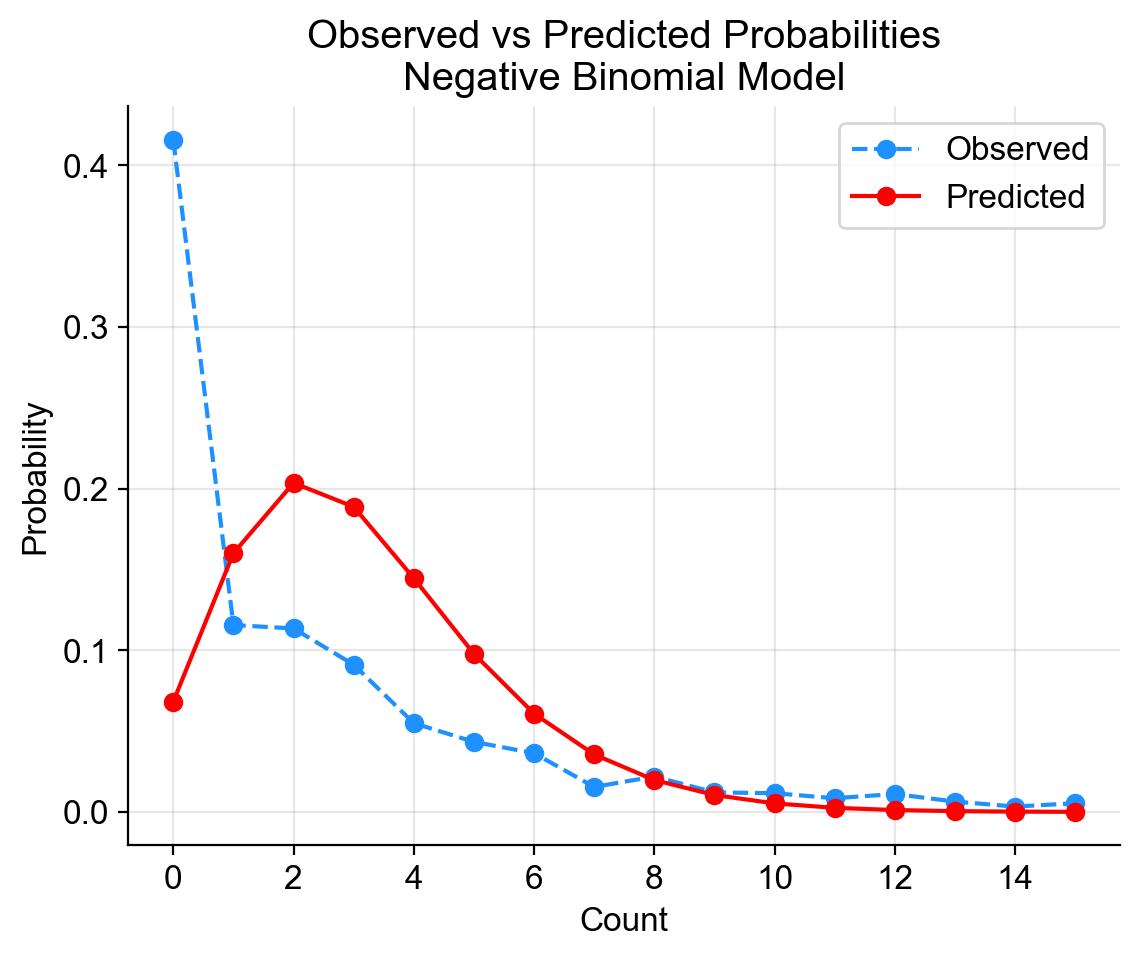

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import poisson, chi2

%config InlineBackend.figure_format = 'retina'

# Load the dataset
dataset = pd.read_csv("datasets/COUNT/rwm1984.csv")

cat_columns = ["female", "married"]
num_columns = ["age"]

cat_frame = pd.get_dummies(dataset[cat_columns].astype("category"), drop_first=True, dtype=int)
num_frame = dataset[num_columns]

X = pd.concat([cat_frame, num_frame], axis=1)
y = dataset["docvis"].values

# Fit a Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.NegativeBinomial(alpha=2.0)).fit()

# Display the summary
print(poisson_model.summary())

# Calculate the Poisson probabilities
mu = poisson_model.predict(X)
poisson_probs = poisson.pmf(y, mu)

# Compute the log-likelihood
log_likelihood = np.sum(np.log(poisson_probs))
print(f"Log-likelihood of the data: {log_likelihood}")

# Select a common range for bins
bins_min = min(y.min(), mu.min())
bins_max = max(y.max(), mu.max())

# Create bins for the histogram
bins = np.arange(bins_min, bins_max + 1)

# Plot predicted vs. observed values in a histogram using PMF
sns.histplot(y, color="dodgerblue", label="Observed", fill=False, bins=bins, linewidth=1.5)
sns.histplot(mu, color="red", label="Predicted", fill=False, bins=bins, linewidth=1.5)

plt.xlim(0, 15)

# Use log likelihood of the null model
null_model = poisson(y.mean())
null_log_likelihood = np.sum(np.log(null_model.pmf(y)))

# Perform Chi-Square Test on the log-likelihood
chi2_stat = -2 * (null_log_likelihood - log_likelihood)
p_value = 1 - chi2.cdf(chi2_stat, 1)

print(f"Chi-Square Statistic: {chi2_stat}, p-value: {p_value}")

fig, ax = plt.subplots()
plot_observed_vs_predicted(
    y,
    mu,
    max_count=15,
    alpha=0.0,
    title="Observed vs Predicted Probabilities",
    model_name="Negative Binomial Model",
    ax=ax,
)

When exponentiated, Poisson and NB2 parameter estimates may be interpreted as incidence rate ratios.

The estimates may be interpreted as:
- Females are expected to visit the doctor some 50% more times during the year than males, holding marital status and age constant.
- Married patients are expected to visit the doctor some 16% fewer times during the year than unmarried patients, holding gender and age constant.
- For a one year increase in age, the rate of visits to the doctor increases by some 2%, with marital status and gender held constant.

In [4]:
# Exponentiate the coefficients
poisson_model_odds = np.exp(poisson_model.params)

# Display the exponentiated coefficients
print(poisson_model_odds)

female_1    1.51
married_1   0.82
age         1.02
dtype: float64


### Poisson model

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 3874
Model:                            GLM   Df Residuals:                     3866
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15503.
Date:                Sun, 04 May 2025   Deviance:                       23923.
Time:                        17:46:09   Pearson chi2:                 4.34e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3826
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0156      0.045      0.348      0.7

,Count,Frequency Observed,Frequency Predicted,Probability Observed,Probability Predicted
0,0,1611,283.79,0.42,0.07
1,1,448,640.65,0.12,0.17
2,2,440,787.74,0.11,0.20
3,3,353,712.79,0.09,0.18
4,4,213,539.78,0.05,0.14
5,5,168,366.89,0.04,0.09
6,6,141,232.64,0.04,0.06
7,7,60,140.14,0.02,0.04
8,8,85,80.68,0.02,0.02
9,9,47,44.37,0.01,0.01


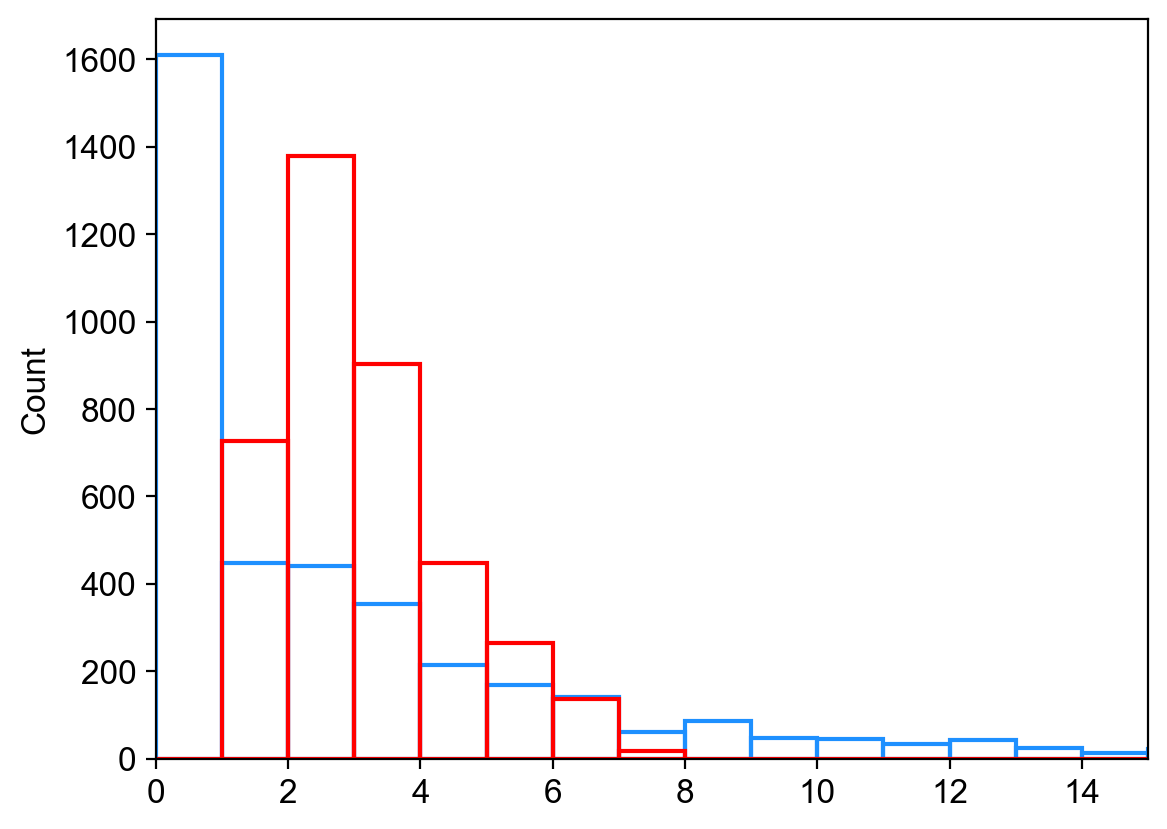

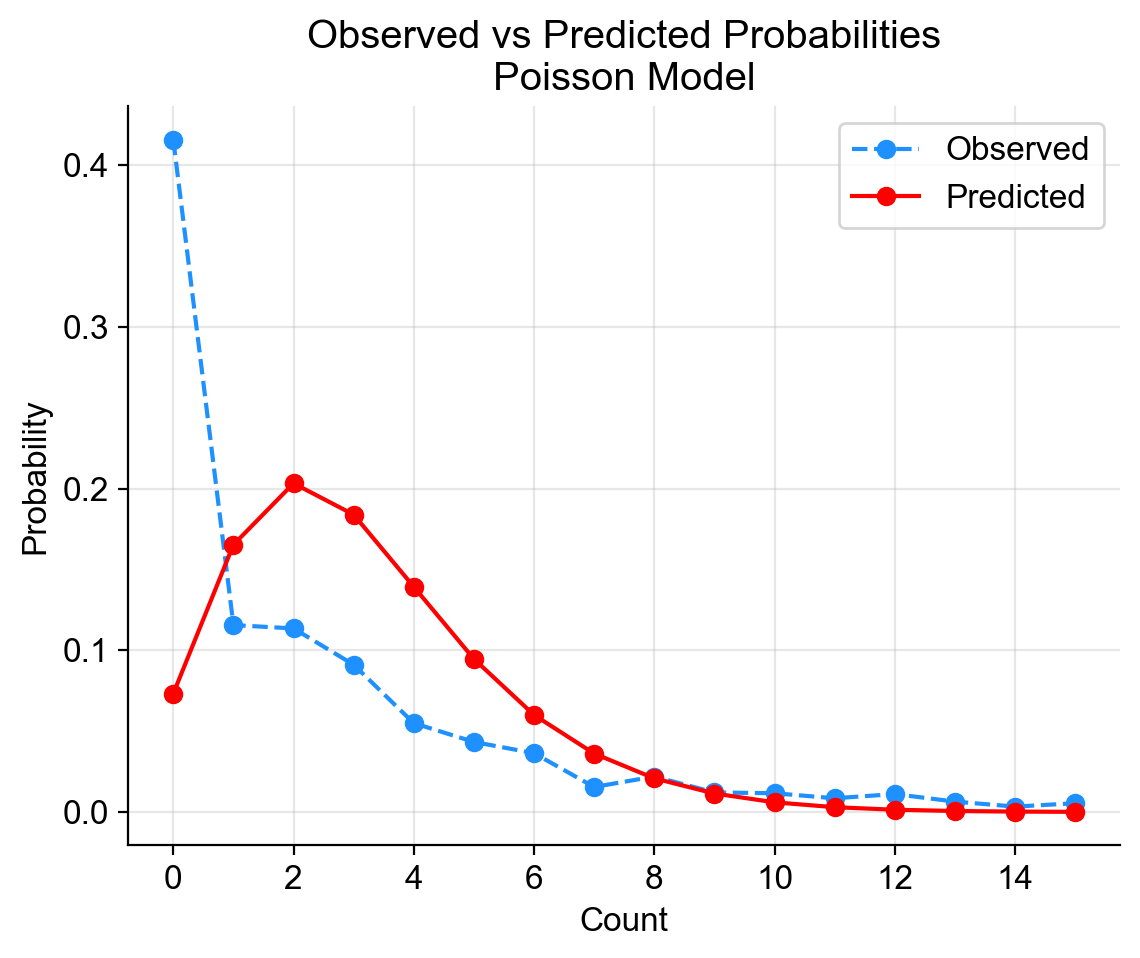

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import poisson, chi2

%config InlineBackend.figure_format = 'retina'

# Load the dataset
dataset = pd.read_csv("datasets/COUNT/rwm1984.csv")

# outwork | .26473 .0934473 2.83 0.005 .0815767 .4478834
# age | .0221169 .002909 7.60 0.000 .0164153 .0278185
# female | .2615599 .0914541 2.86 0.004 .0823132 .4408065
# married | -.128839 .0871441 -1.48 0.139 -.2996382 .0419602
# edlevel2 | -.0743016 .1043152 -0.71 0.476 -.2787557 .1301524
# edlevel3 | -.1825212 .0972583 -1.88 0.061 -.373144 .0081016
# edlevel4 | -.2644094 .1556778 -1.70 0.089 -.5695323 .0407135
# _cons | .0156058 .1801753 0.09 0.931 -.3375313 .3687428

features = ["age", "outwork", "female", "married", "edlevel2", "edlevel3", "edlevel4"]

X = dataset[features]
X = sm.add_constant(X)
y = dataset["docvis"].values

# Fit a Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Display the summary
print(poisson_model.summary())

# Calculate the Poisson probabilities
mu = poisson_model.predict(X)
poisson_probs = poisson.pmf(y, mu)

# Compute the log-likelihood
log_likelihood = np.sum(np.log(poisson_probs))

print(f"Log-likelihood of the data: {log_likelihood}")

# Select a common range for bins
bins_min = min(y.min(), mu.min())
bins_max = max(y.max(), mu.max())

# Create bins for the histogram
bins = np.arange(bins_min, bins_max + 1)

# Plot predicted vs. observed values in a histogram using PMF
sns.histplot(y, color="dodgerblue", label="Observed", fill=False, bins=bins, linewidth=1.5)
sns.histplot(mu, color="red", label="Predicted", fill=False, bins=bins, linewidth=1.5)

plt.xlim(0, 15)

# Use log likelihood of the null model
null_model = poisson(y.mean())
null_log_likelihood = np.sum(np.log(null_model.pmf(y)))

# Perform Chi-Square Test on the log-likelihood
chi2_stat = -2 * (null_log_likelihood - log_likelihood)
p_value = 1 - chi2.cdf(chi2_stat, 1)

print(f"Chi-Square Statistic: {chi2_stat}, p-value: {p_value}")

fig, ax = plt.subplots()
plot_observed_vs_predicted(
    y,
    mu,
    max_count=15,
    alpha=0.0,
    title="Observed vs Predicted Probabilities",
    model_name="Poisson Model",
    ax=ax,
)

### Negative binomial model

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 3874
Model:                            GLM   Df Residuals:                     3866
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8653.4
Date:                Sun, 04 May 2025   Deviance:                       6453.2
Time:                        17:46:09   Pearson chi2:                 1.06e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1156
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0091      0.087     -0.104      0.9

/Users/deburky/Documents/python/python-ml-projects/.venv/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


,Count,Frequency Observed,Frequency Predicted,Probability Observed,Probability Predicted
0,0,1611,1497.43,0.42,0.39
1,1,448,626.87,0.12,0.16
2,2,440,395.15,0.11,0.10
3,3,353,277.79,0.09,0.07
4,4,213,205.80,0.05,0.05
5,5,168,157.38,0.04,0.04
6,6,141,123.00,0.04,0.03
7,7,60,97.71,0.02,0.03
8,8,85,78.62,0.02,0.02
9,9,47,63.92,0.01,0.02


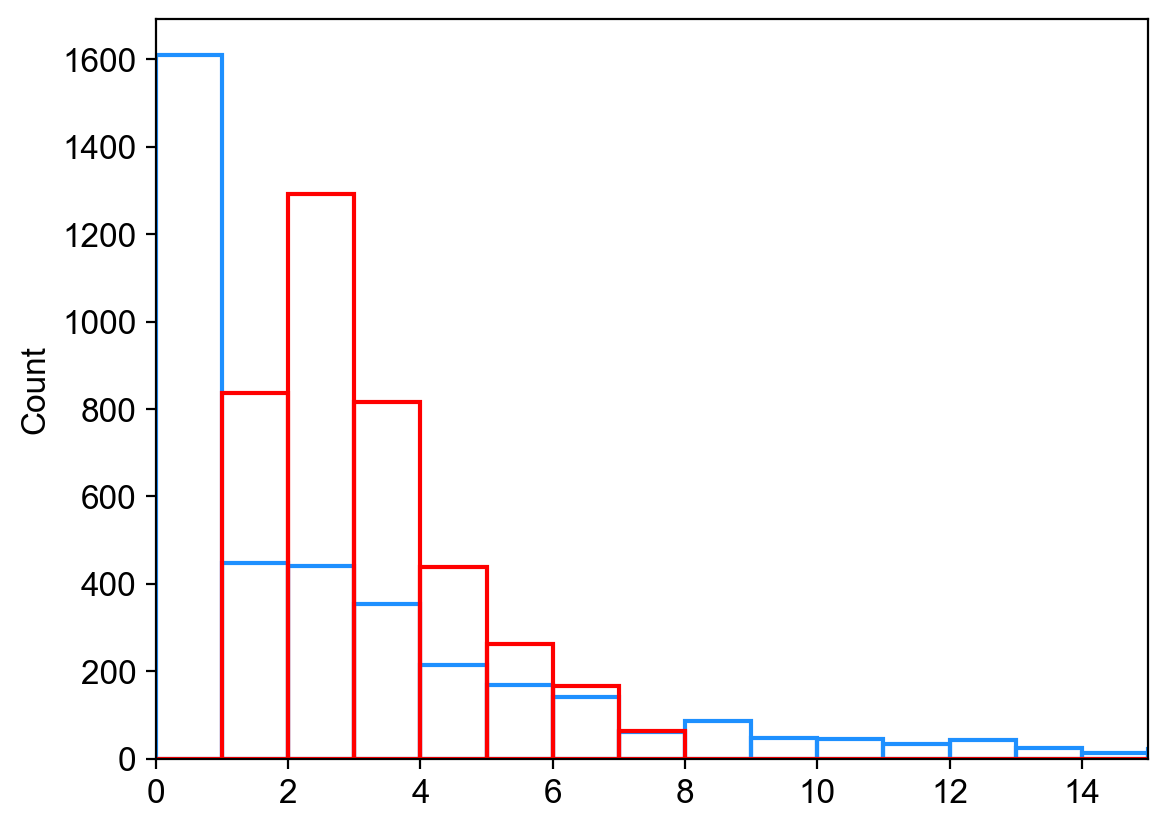

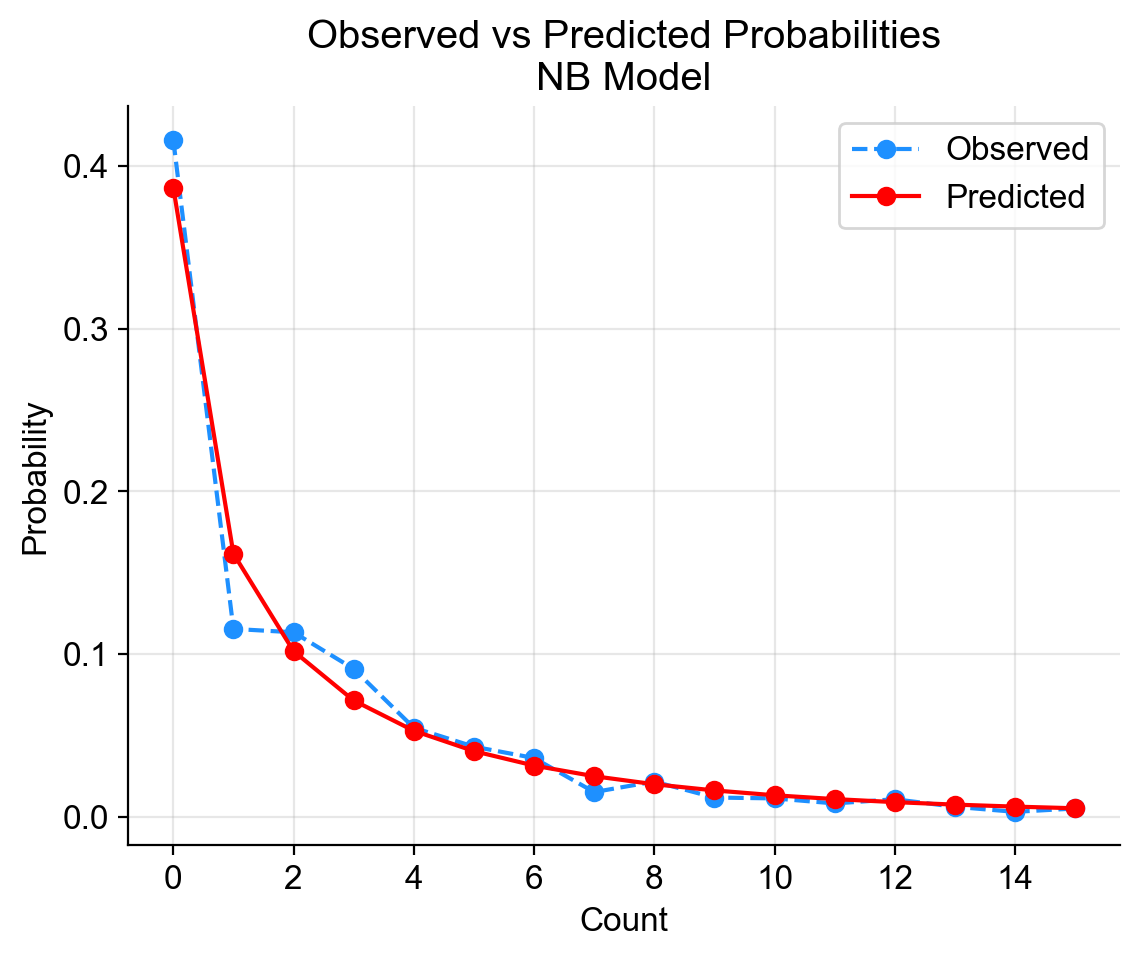

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import poisson, chi2

%config InlineBackend.figure_format = 'retina'

# Load the dataset
dataset = pd.read_csv("datasets/COUNT/rwm1984.csv")

# outwork | .2733504 .0812069 3.37 0.001 .1141879 .4325129
# age | .0232448 .0026847 8.66 0.000 .0179828 .0285068
# female | .3164156 .0758391 4.17 0.000 .1677737 .4650576
# married | -.1906226 .0855496 -2.23 0.026 -.3582968 -.0229485
# edlevel2 | -.1139377 .1051687 -1.08 0.279 -.3200647 .0921893
# edlevel3 | -.1948105 .098729 -1.97 0.048 -.3883158 -.0013051
# edlevel4 | -.3628498 .1321642 -2.75 0.006 -.6218868 -.1038127
# _cons | -.013249 .1520918 -0.09 0.931 -.3113435 .2848456

features = ["age", "outwork", "female", "married", "edlevel2", "edlevel3", "edlevel4"]

X = dataset[features]
X = sm.add_constant(X)
y = dataset["docvis"].values

# Fit a Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

# Display the summary
print(poisson_model.summary())

# Calculate the Poisson probabilities
mu = poisson_model.predict(X)
poisson_probs = poisson.pmf(y, mu)

# Compute the log-likelihood
log_likelihood = np.sum(np.log(poisson_probs))

print(f"Log-likelihood of the data: {log_likelihood}")

# Select a common range for bins
bins_min = min(y.min(), mu.min())
bins_max = max(y.max(), mu.max())

# Create bins for the histogram
bins = np.arange(bins_min, bins_max + 1)

# Plot predicted vs. observed values in a histogram using PMF
sns.histplot(y, color="dodgerblue", label="Observed", fill=False, bins=bins, linewidth=1.5)
sns.histplot(mu, color="red", label="Predicted", fill=False, bins=bins, linewidth=1.5)

plt.xlim(0, 15)

# Use log likelihood of the null model
null_model = poisson(y.mean())
null_log_likelihood = np.sum(np.log(null_model.pmf(y)))

# Perform Chi-Square Test on the log-likelihood
chi2_stat = -2 * (null_log_likelihood - log_likelihood)
p_value = 1 - chi2.cdf(chi2_stat, 1)

print(f"Chi-Square Statistic: {chi2_stat}, p-value: {p_value}")

fig, ax = plt.subplots()
plot_observed_vs_predicted(
    y,
    mu,
    max_count=15,
    alpha=2.0,
    title="Observed vs Predicted Probabilities",
    model_name="NB Model",
    ax=ax,
)

### Gradient-boosted decision trees

Can ML models outperform the Poisson regression model?

XGBoost Log-likelihood of the data: -4465.58
CatBoost Log-likelihood of the data: -8530.77


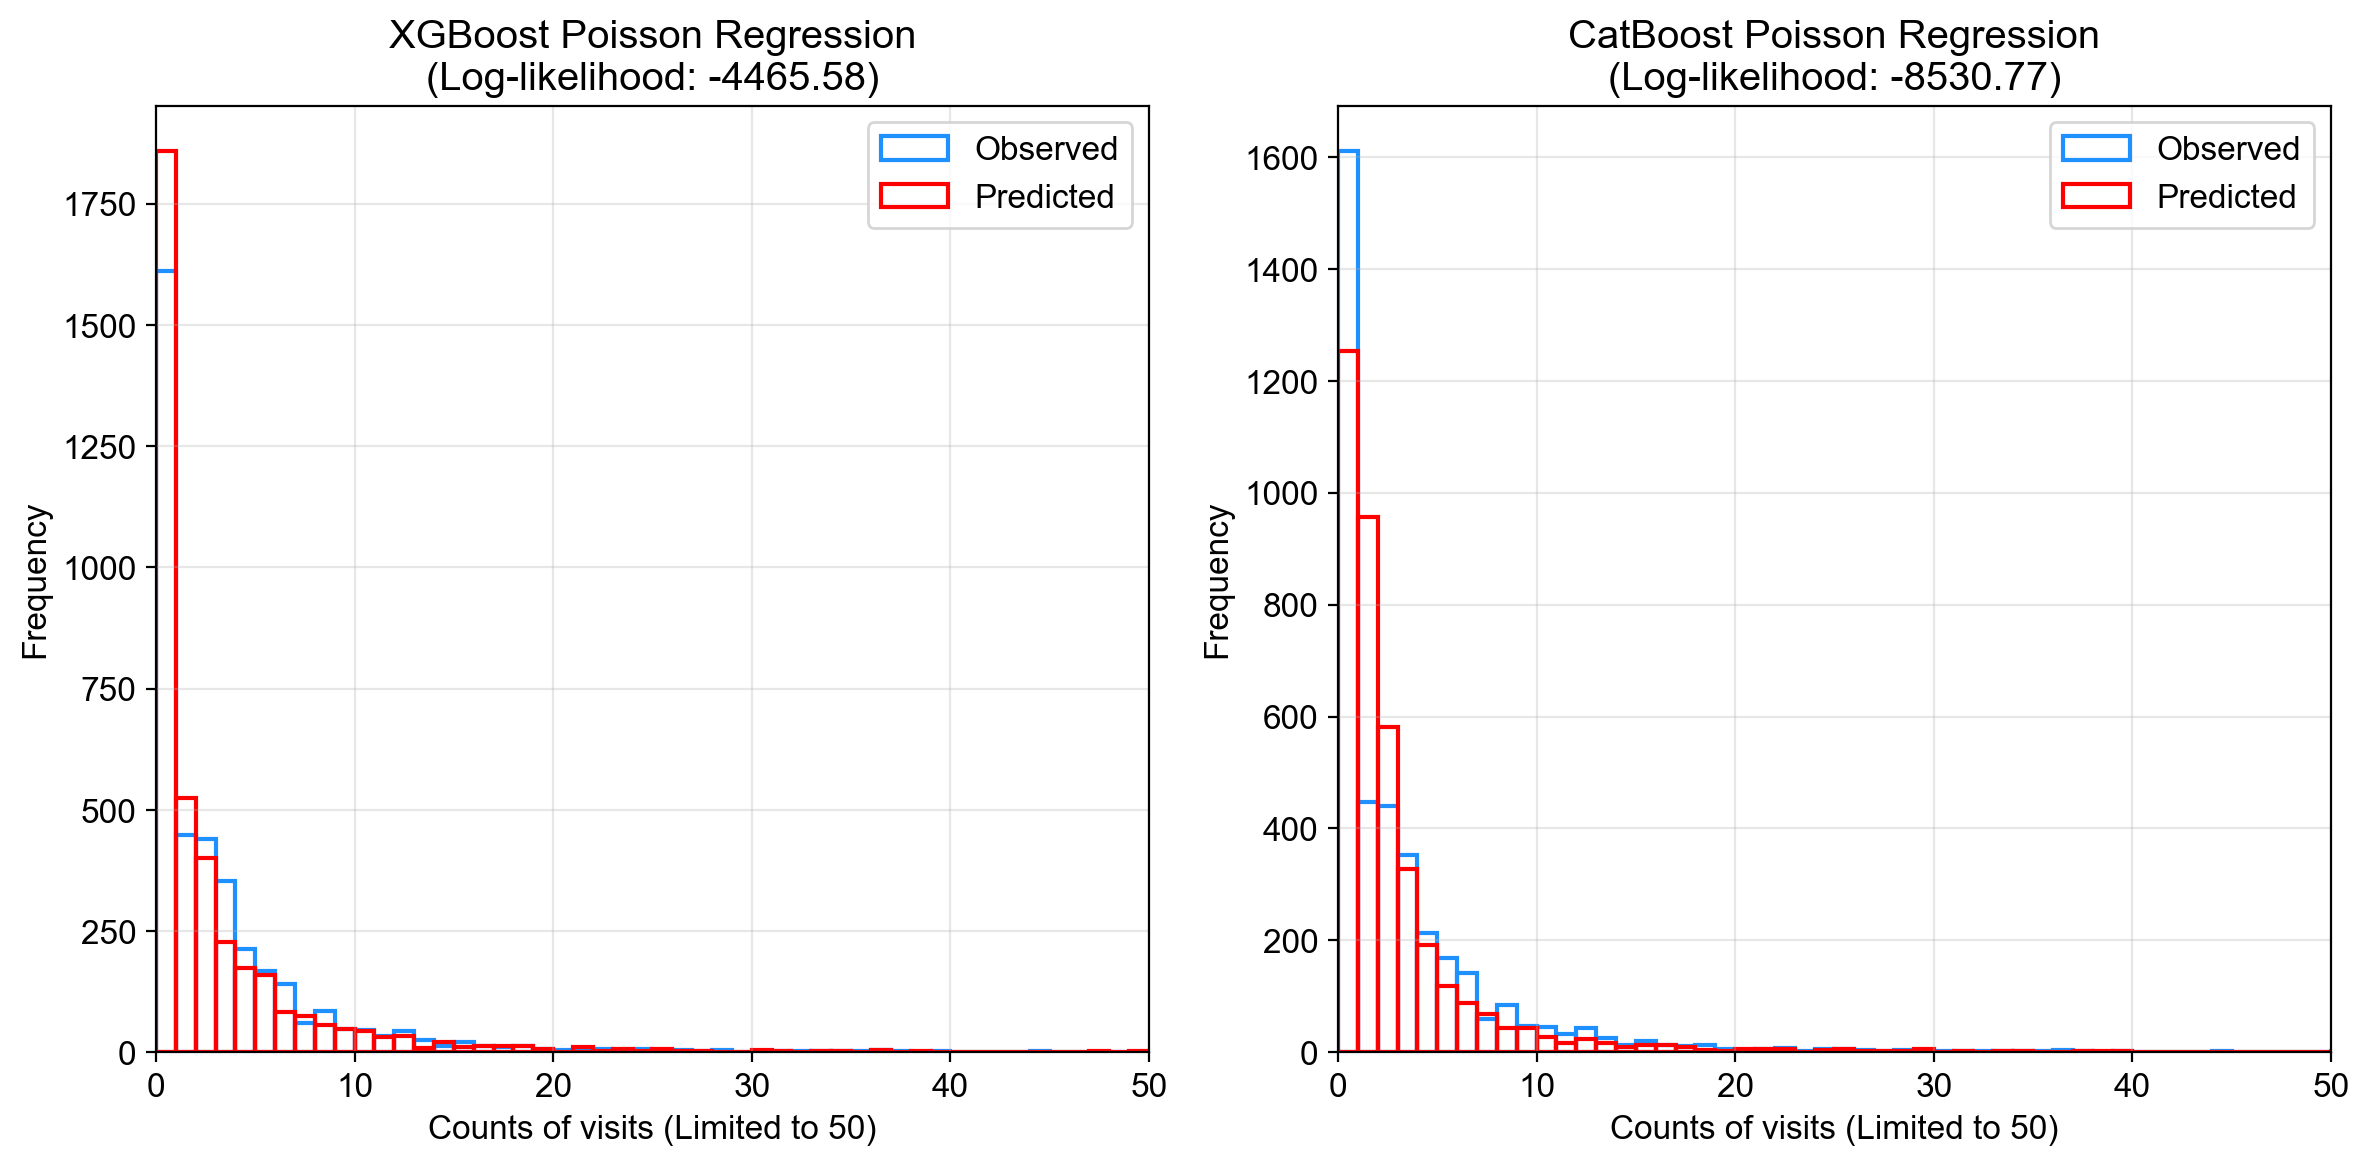

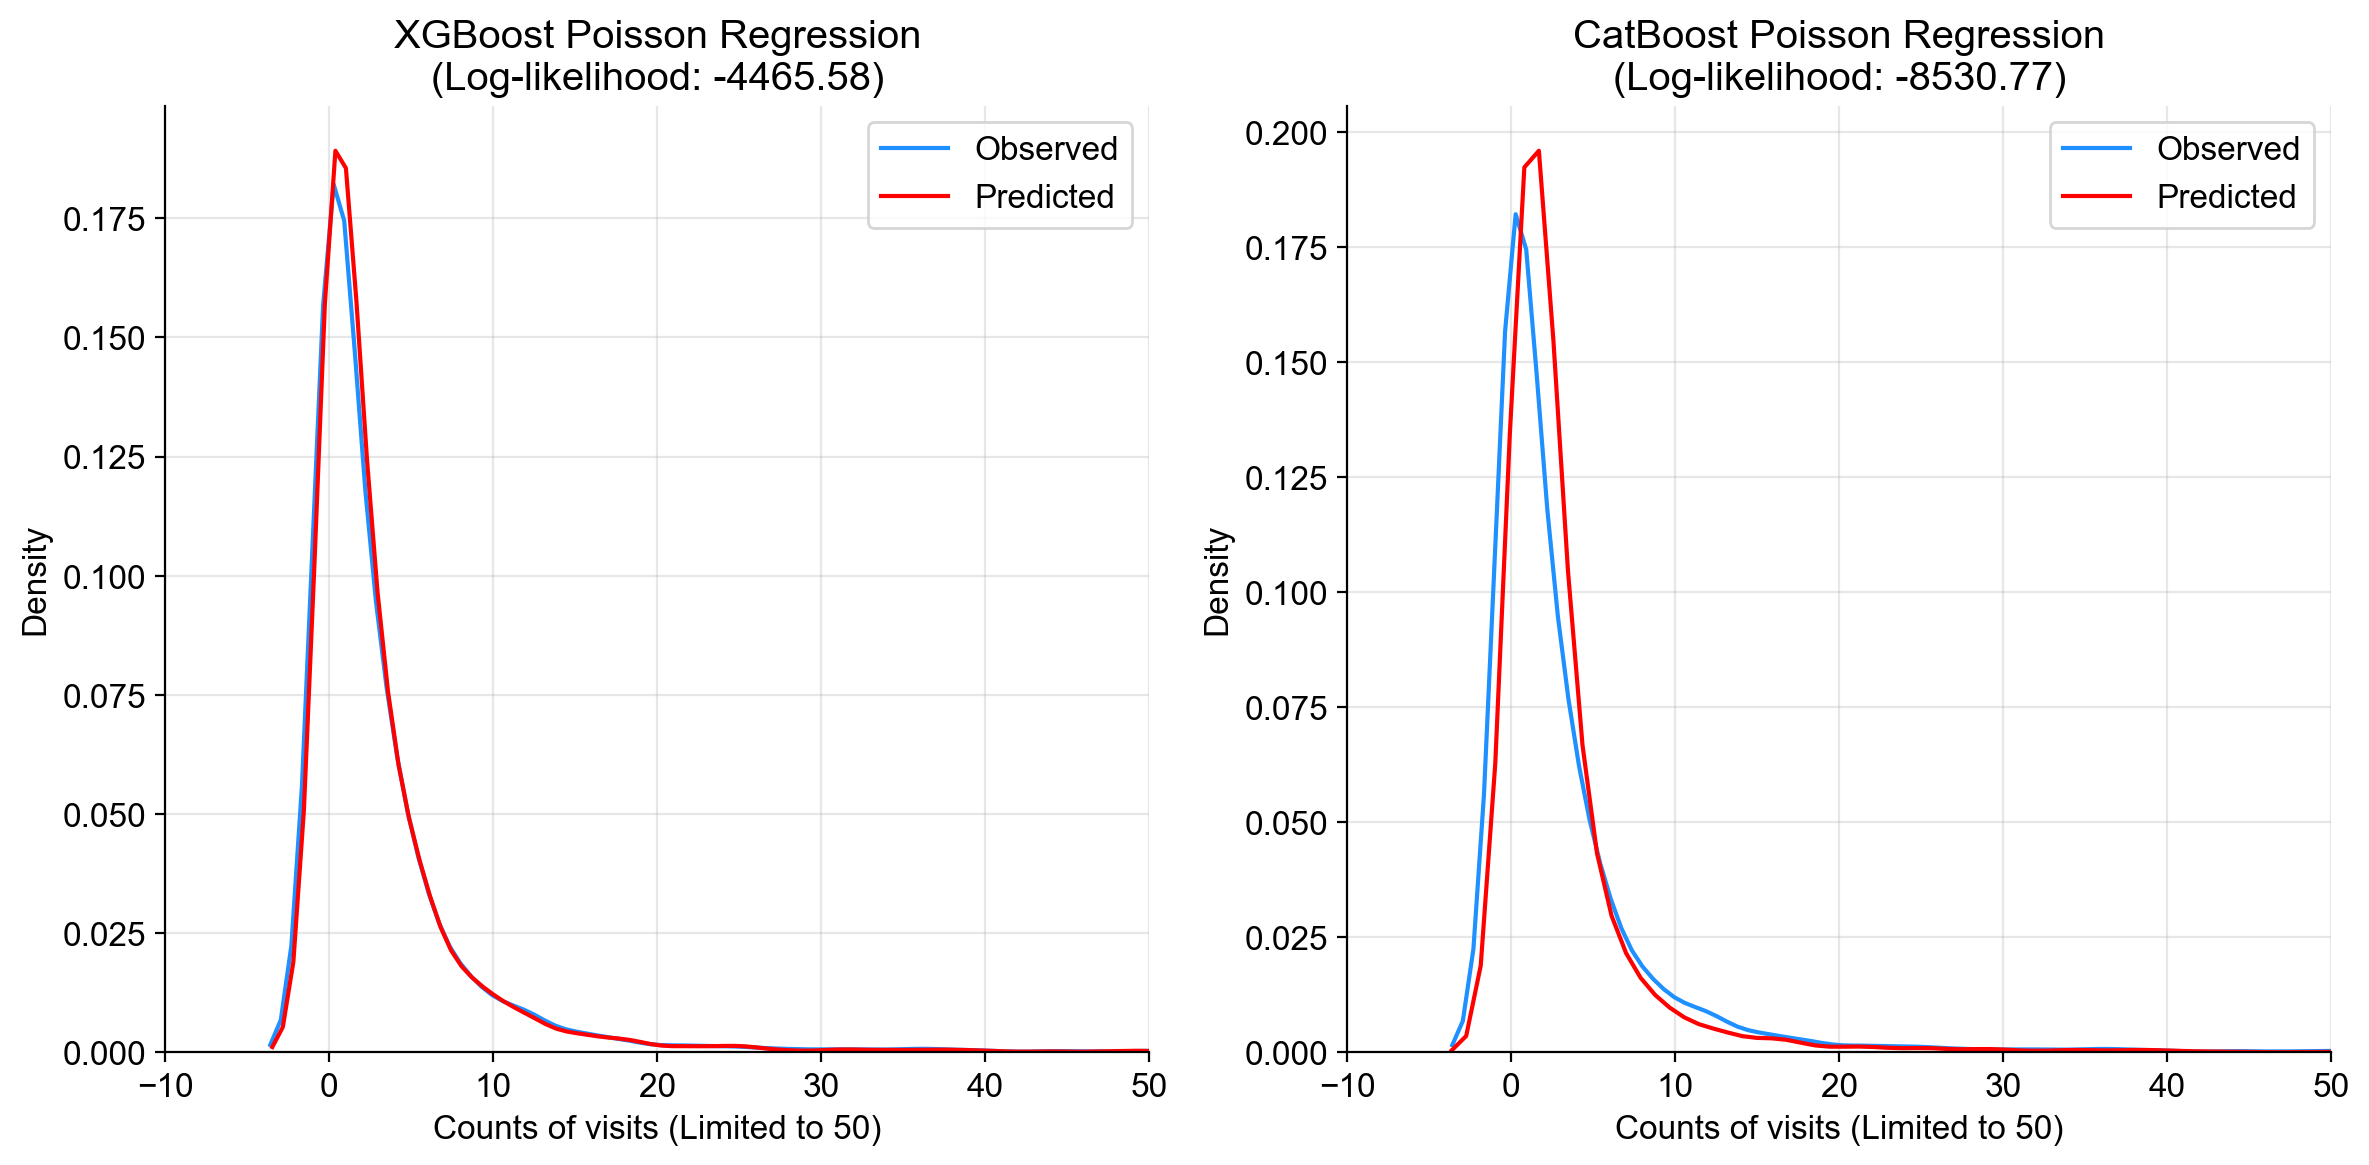

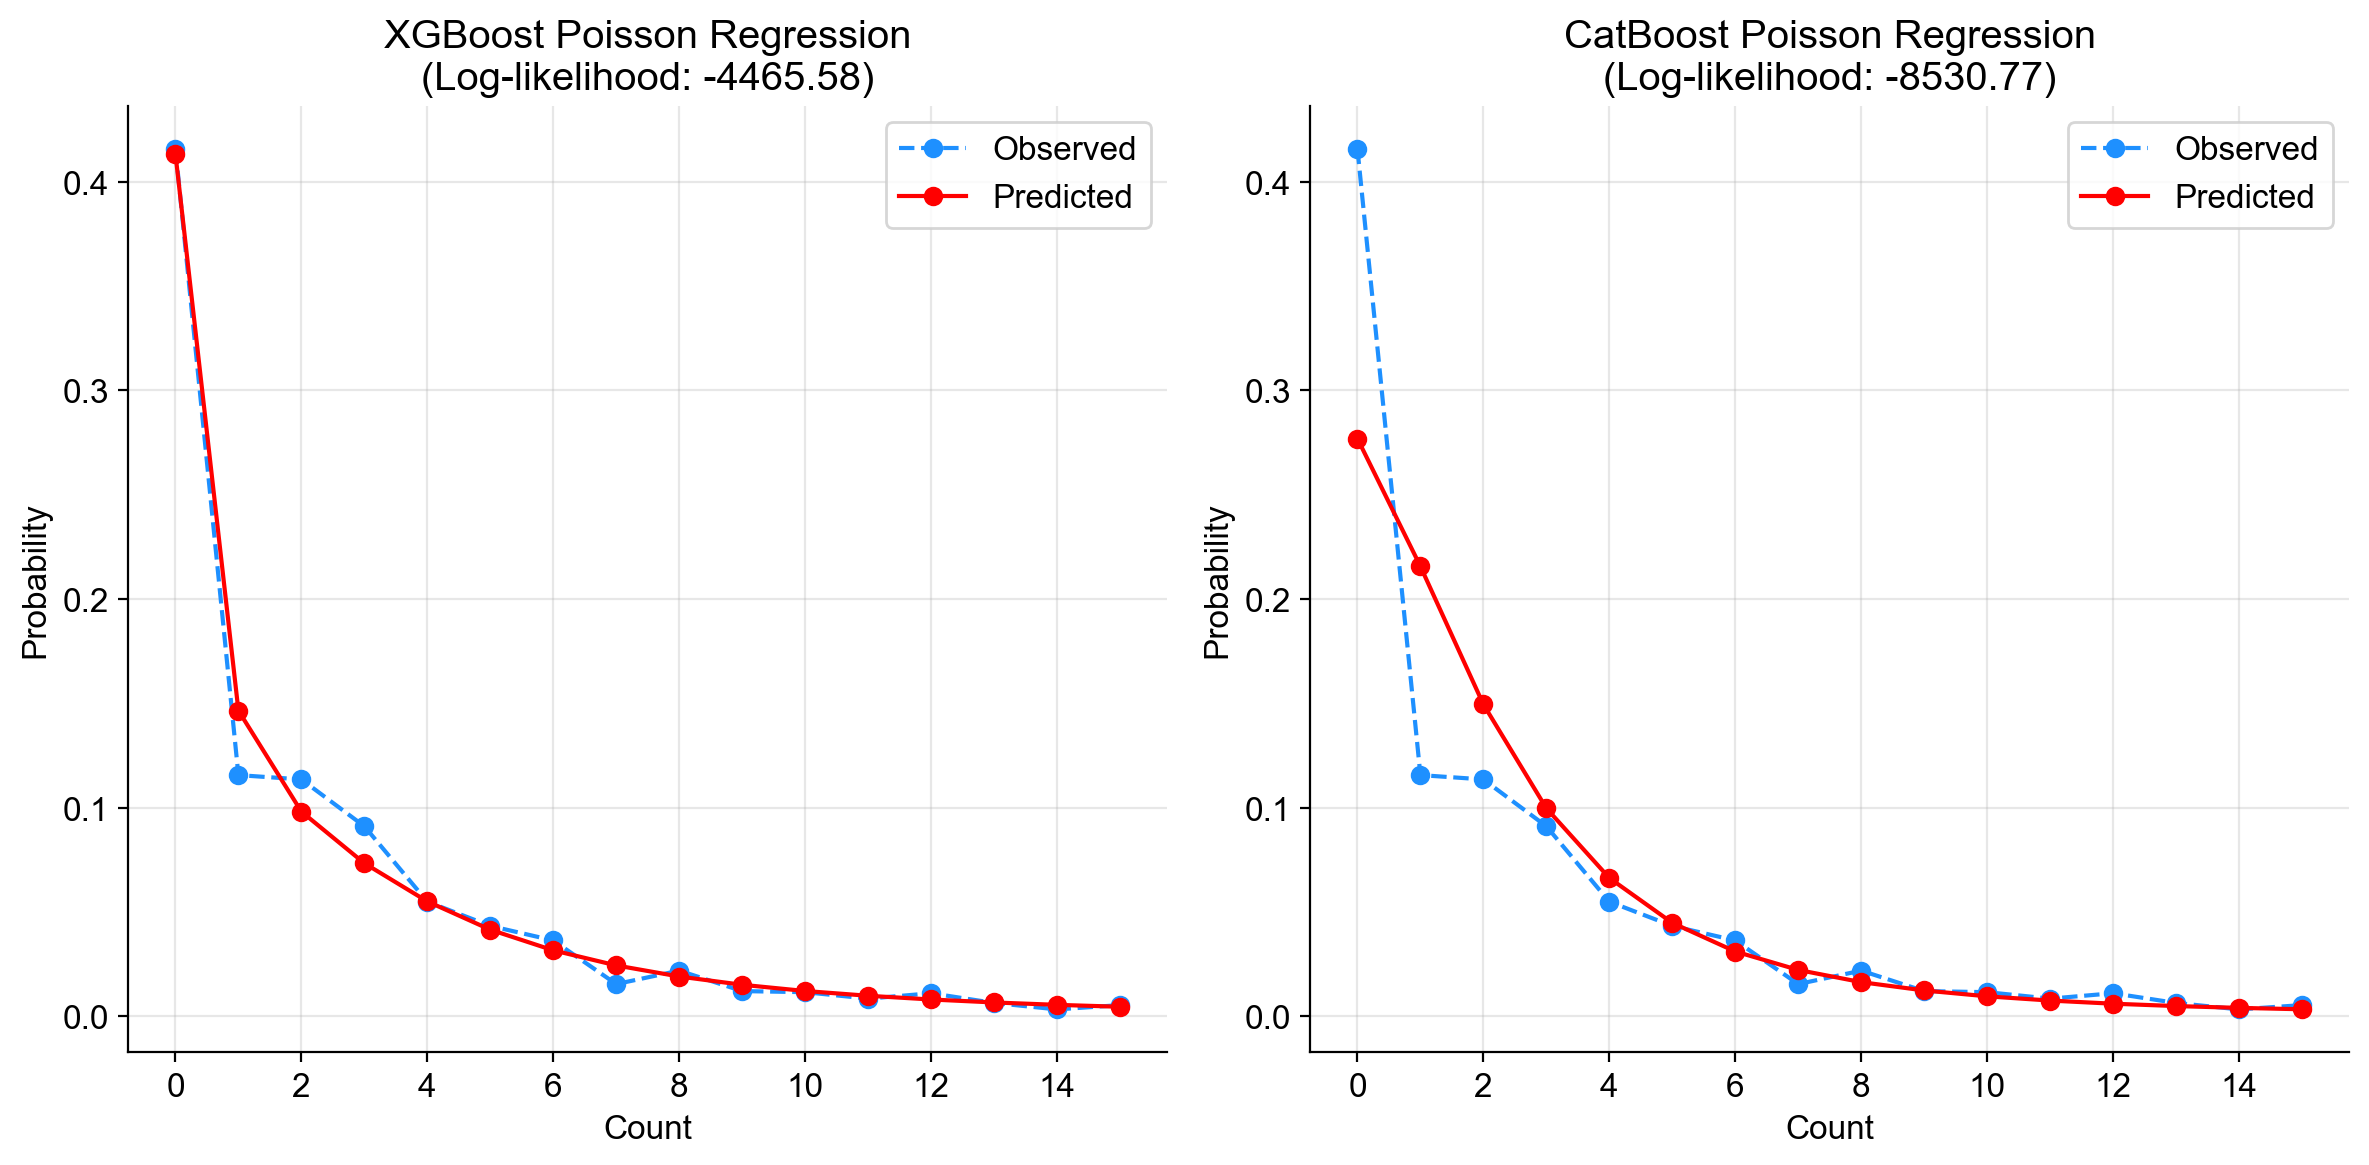

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

import xgboost as xgb
from catboost import CatBoostRegressor

# Load the dataset
dataset = pd.read_csv("../datasets/COUNT/rwm1984.csv")

cat_columns = ["edlevel", "female", "kids", "self"]
num_columns = ["age", "educ", "hhninc", "hospvis"]

# For XGBoost
cat_frame = pd.get_dummies(dataset[cat_columns].astype("category"), drop_first=True, dtype=int)
num_frame = dataset[num_columns]

X = dataset[cat_columns + num_columns]
y = dataset["docvis"].values

# Define models in a dictionary
models = {
    "XGBoost": xgb.XGBRegressor(objective="count:poisson", n_estimators=100, max_depth=10, learning_rate=1.0),
    "CatBoost": CatBoostRegressor(
        cat_features=cat_columns,
        loss_function="Poisson",
        n_estimators=100,
        max_depth=10,
        learning_rate=1.0,
        verbose=0,
        allow_writing_files=False,
    ),
}

# Fit models and collect results
results = {}
for name, model in models.items():
    model.fit(X, y)
    predictions = model.predict(X)

    # Calculate log-likelihood
    poisson_probs = poisson.pmf(y, predictions)
    log_likelihood = np.sum(np.log(poisson_probs))

    results[name] = {"model": model, "predictions": predictions, "log_likelihood": log_likelihood}

# Print Log-Likelihoods
for name, result in results.items():
    print(f"{name} Log-likelihood of the data: {result['log_likelihood']:.2f}")

# Select a common range for bins
bins_min = min(y.min(), min(result["predictions"].min() for result in results.values()))
bins_max = max(y.max(), max(result["predictions"].max() for result in results.values()))
bins = np.arange(bins_min, bins_max + 1)

# Plotting Observed vs Predicted Histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

for ax, (name, result) in zip(axes, results.items(), strict=False):
    sns.histplot(y, color="dodgerblue", label="Observed", fill=False, bins=bins, linewidth=1.5, ax=ax)
    sns.histplot(
        result["predictions"], color="red", label="Predicted", fill=False, bins=bins, linewidth=1.5, ax=ax, alpha=1.0
    )
    ax.set_xlabel("Counts of visits (Limited to 50)")
    ax.set_ylabel("Frequency")
    ax.set_title(f"{name} Poisson Regression\n(Log-likelihood: {result['log_likelihood']:.2f})")
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 50)

plt.tight_layout()
plt.show()

# Plotting Observed vs Predicted Densities
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

for ax, (name, result) in zip(axes, results.items(), strict=False):
    sns.kdeplot(y, color="dodgerblue", label="Observed", fill=False, linewidth=1.5, ax=ax)
    sns.kdeplot(result["predictions"], color="red", label="Predicted", fill=False, linewidth=1.5, ax=ax)
    ax.set_xlabel("Counts of visits (Limited to 50)")
    ax.set_ylabel("Density")
    ax.set_title(f"{name} Poisson Regression\n(Log-likelihood: {result['log_likelihood']:.2f})")
    ax.legend()
    ax.grid(True, alpha=0.3)
    # Disable spines
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xlim(-10, 50)

plt.tight_layout()
plt.show()

# add visualization for mu_xgb and mu_cb with plot_observed_vs_predicted
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

for i, (name, result) in enumerate(results.items(), 1):
    mu = result["predictions"]
    plot_observed_vs_predicted(
        y,
        mu,
        max_count=15,
        alpha=None,
        title=f"{name} Poisson Regression",
        model_name=f"(Log-likelihood: {result['log_likelihood']:.2f})",
        ax=axes[i - 1],
    )
plt.tight_layout()

## Poisson regression from scratch with 🐍 Python

Converged in 12 iterations.


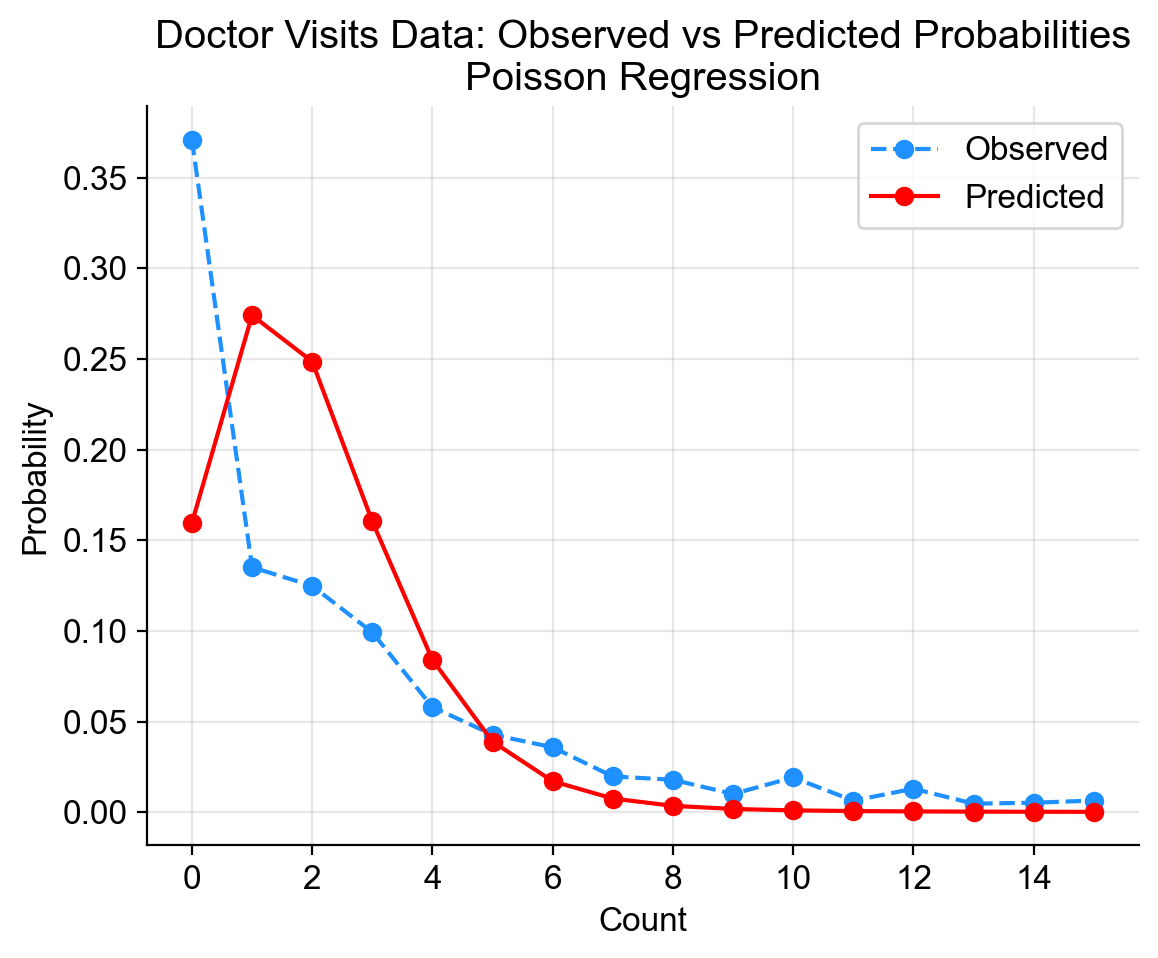

In [8]:
import pandas as pd
from fisher_poisson_regression import FisherPoissonRegression
from utils import plot_observed_vs_predicted

# path_to_csv = (
#     "https://raw.githubusercontent.com/"
#     "vincentarelbundock/Rdatasets/refs/heads/master/csv/COUNT/rwm.csv"
# )

path_to_csv = "Rdatasets/csv/COUNT/rwm.csv"
docvis_data = pd.read_csv(path_to_csv)

poisson_model = FisherPoissonRegression(use_bias=False)

X = docvis_data[["hhninc"]].values
y = docvis_data["docvis"].values

# Fit the Poisson regression model
poisson_model.fit(X, y)

# Make predictions
mu = poisson_model.predict(X)

# Plot Observed vs Predicted probabilities
df_results = plot_observed_vs_predicted(
    y,
    mu,
    max_count=15,
    title="Doctor Visits Data: Observed vs Predicted Probabilities",
    model_name="Poisson Regression",
)

In [9]:
print(f"Negative binomial coefficient: {poisson_model.weights[0]:.4f}")

poisson_model_sm = sm.GLM(y, X, family=sm.families.Poisson()).fit()

print(poisson_model_sm.summary())

Negative binomial coefficient: 0.1853
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                27326
Model:                            GLM   Df Residuals:                    27325
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2646e+05
Date:                Sun, 04 May 2025   Deviance:                   1.9987e+05
Time:                        17:46:19   Pearson chi2:                 5.69e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             -2.678
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            

Converged in 8 iterations.


,Count,Frequency Observed,Frequency Predicted,Probability Observed,Probability Predicted
0,0,10135,12057.5746,0.3709,0.4412
1,1,3692,4136.7049,0.1351,0.1514
2,2,3412,2490.5743,0.1249,0.0911
3,3,2711,1718.4623,0.0992,0.0629
4,4,1584,1263.2920,0.0580,0.0462
5,5,1169,964.0854,0.0428,0.0353
6,6,979,754.5029,0.0358,0.0276
7,7,539,601.4624,0.0197,0.0220
8,8,489,486.3702,0.0179,0.0178
9,9,275,397.8868,0.0101,0.0146


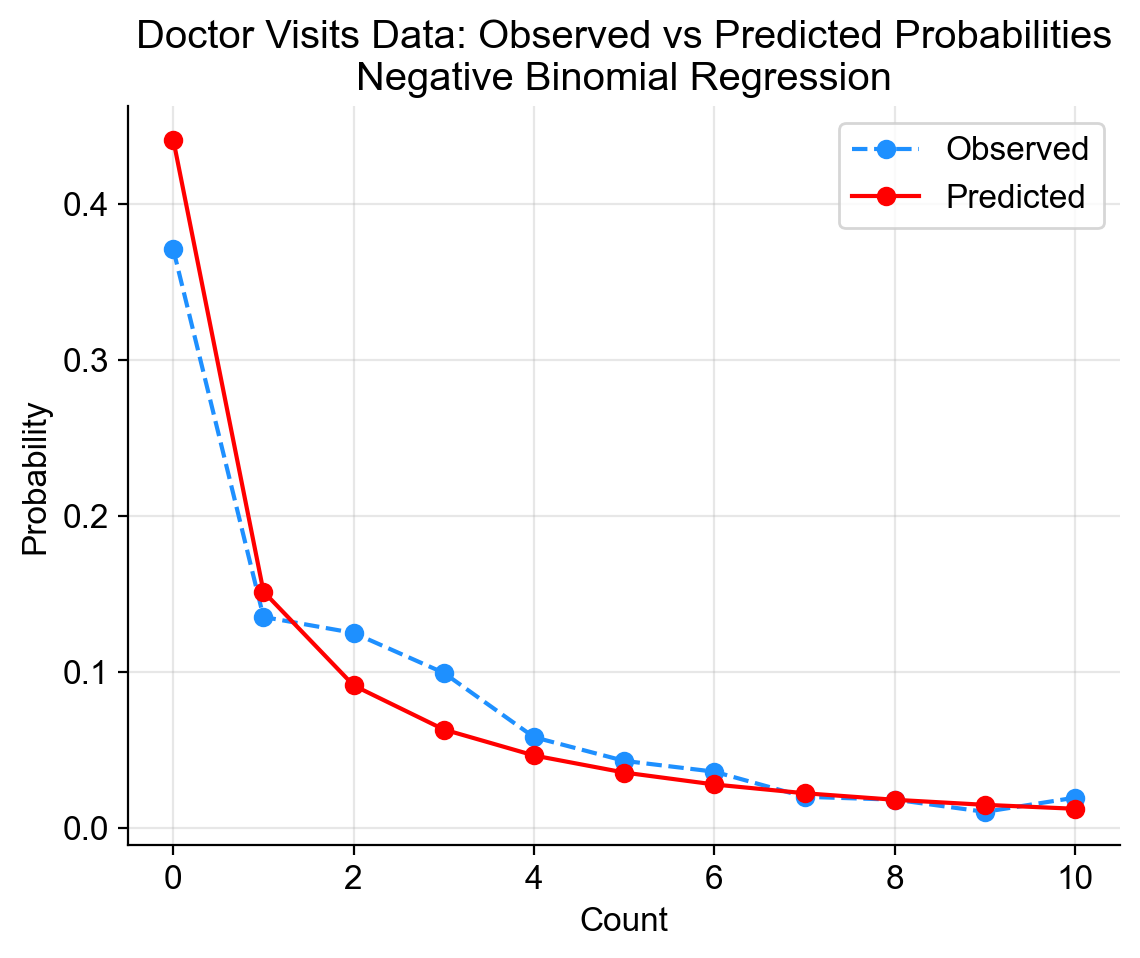

In [10]:
from fisher_poisson_regression import FisherNegativeBinomialRegression

neg_model = FisherNegativeBinomialRegression(alpha=2.0)

X = docvis_data[["hhninc"]].values
y = docvis_data["docvis"].values

neg_model.fit(X, y)

mu = neg_model.predict(X)
# mle = np.full_like(y, np.mean(y))

# Plot Observed vs Predicted probabilities
df_results = plot_observed_vs_predicted(
    y,
    mu,
    max_count=10,
    title="Doctor Visits Data: Observed vs Predicted Probabilities",
    model_name="Negative Binomial Regression",
    alpha=2.5,
)

# Set pandas display options to :.4f
pd.set_option("display.float_format", "{:.4f}".format)
df_results

In [11]:
print(f"Negative binomial coefficient: {neg_model.weights[0]:.4f}")

import statsmodels.api as sm

nb_model_sm = sm.GLM(y, X, family=sm.families.NegativeBinomial(alpha=2.0))

print(nb_model_sm.fit().summary())

Negative binomial coefficient: 0.2896
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                27326
Model:                            GLM   Df Residuals:                    27325
Model Family:        NegativeBinomial   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63102.
Date:                Sun, 04 May 2025   Deviance:                       33465.
Time:                        17:46:24   Pearson chi2:                 8.61e+04
No. Iterations:                    10   Pseudo R-squ. (CS):            -0.1802
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            

In [12]:
import numpy as np

preds_ps = np.exp(X @ poisson_model.weights)
preds_nb = np.exp(X @ neg_model.weights)

pd.DataFrame(
    {
        "Observed": y,
        "Poisson": preds_ps,
        "Negative Binomial": preds_nb,
    }
).describe()

,Observed,Poisson,Negative Binomial
count,27326.0000,27326.0000,27326.0000
mean,3.1835,2.1043,4.5982
std,5.6897,3.7973,81.7301
min,0.0000,1.0000,1.0000
25%,0.0000,1.5600,2.0038
50%,1.0000,1.8093,2.5263
75%,4.0000,2.2184,3.4740
max,121.0000,293.9063,7205.1802


## fisher-scoring

<div style="width: 100%; background: #2d2440; color: white; padding: 20px; border-radius: 5px; margin-bottom: 20px;">
  <p>You can use the model with the <code style="background: #463a5c; padding: 2px 5px; border-radius: 3px;">fisher-scoring</code> package.</p>
  
  <div style="background: #3a3152; padding: 15px; border-radius: 5px; margin-top: 10px;">
    <p>Install the 2.0.4 version with:</p>
    <pre style="background: #221d30; padding: 10px; border-radius: 3px; margin-top: 5px; overflow-x: auto;"><code>uv add fisher-scoring==2.0.4</code></pre>
  </div>
  
  <div style="margin-top: 15px; font-size: 0.9em;">
    <p>The Fisher scoring algorithm is an optimization technique used for finding maximum likelihood estimates.</p>
  </div>
</div>

Converged in 12 iterations.


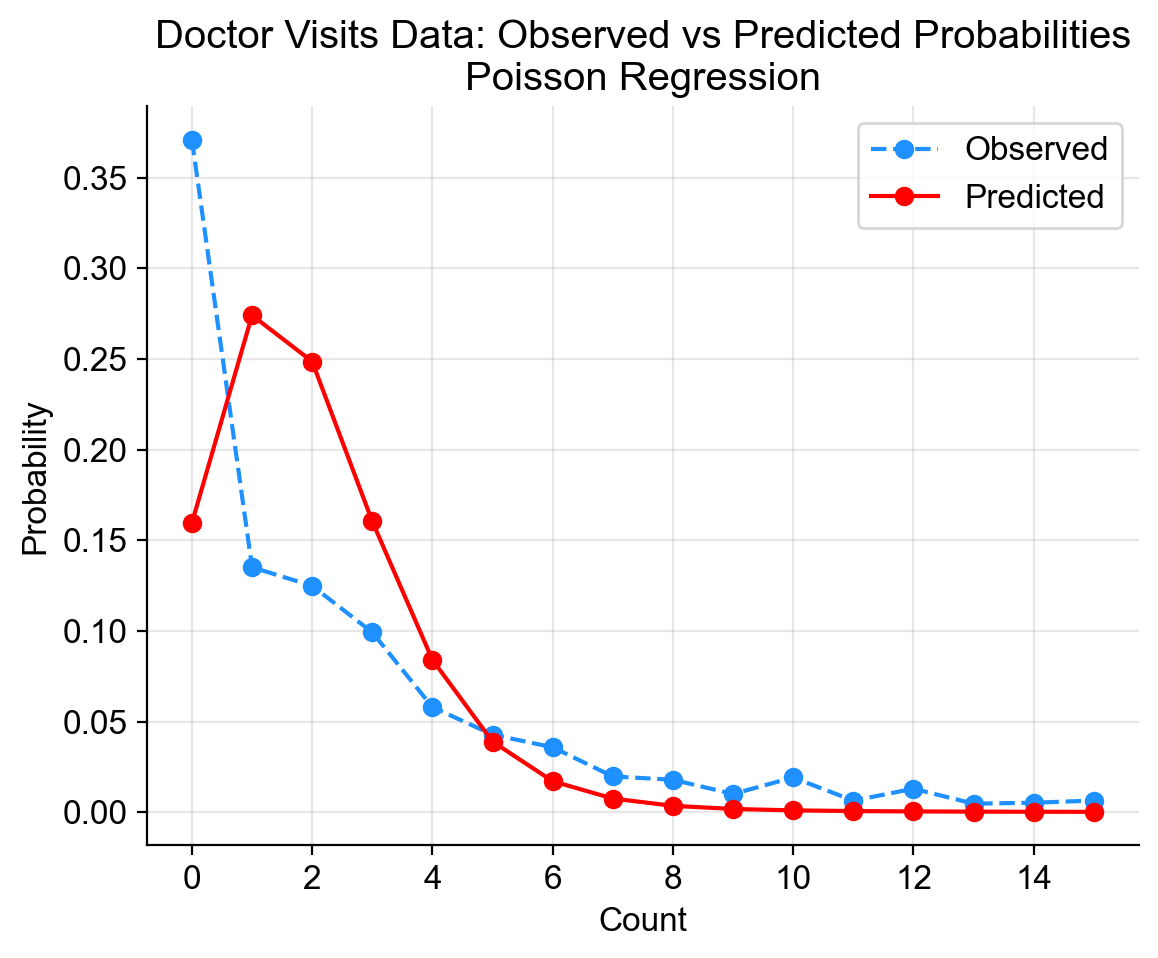

In [14]:
import pandas as pd
from fisher_scoring import PoissonRegression
from fisher_scoring.utils import plot_observed_vs_predicted

# path_to_csv = (
#     "https://raw.githubusercontent.com/"
#     "vincentarelbundock/Rdatasets/refs/heads/master/csv/COUNT/rwm.csv"
# )

path_to_csv = "Rdatasets/csv/COUNT/rwm.csv"
docvis_data = pd.read_csv(path_to_csv)

poisson_model = PoissonRegression(use_bias=False)

X = docvis_data[["hhninc"]].values
y = docvis_data["docvis"].values

# Fit the Poisson regression model
poisson_model.fit(X, y)

# Make predictions
mu = poisson_model.predict(X)

# Plot Observed vs Predicted probabilities
df_results = plot_observed_vs_predicted(
    y,
    mu,
    max_count=15,
    title="Doctor Visits Data: Observed vs Predicted Probabilities",
    model_name="Poisson Regression",
)